<a href="https://colab.research.google.com/github/PyBlin/Study/blob/main/AI_Class1/Day19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuel Efficiency Forecasting Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# IPython 디스플레이 설정 변경 - 출력할 최대 열의 개수
pd.set_option( 'display.max_columns', 20 ) # 출력할 열의 개수 한도
pd.set_option( 'display.max_colwidth', 20 ) # 출력할 열의 너비
pd.set_option( 'display.unicode.east_asian_width', True ) # 유니코드 사용 너비 조정

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


# 1. Create DataFrame

In [3]:
df = pd.read_csv('/drive/MyDrive/Colab/AI1_Ouseoung_Lee/submission_auto-mpg_EDA.csv')
df.head()

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name,kpl,hp_bin
0,0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,chevrolet chevel...,7.716395,avg power
1,1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,buick skylark 320,6.430330,avg power
2,2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,plymouth satellite,7.716395,avg power
3,3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,amc rebel sst,6.859018,avg power
4,4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,ford torino,7.287707,avg power


# 2. 속성 선택

In [4]:
ndf = df[['mpg', 'cylinders', 'horsepower', 'weight']]
ndf.head()

,mpg,cylinders,horsepower,weight
0,18.0,8,130.0,3504.0
1,15.0,8,165.0,3693.0
2,18.0,8,150.0,3436.0
3,16.0,8,150.0,3433.0
4,17.0,8,140.0,3449.0


In [5]:
ndf.corr()

,mpg,cylinders,horsepower,weight
mpg,1.000000,-0.777618,-0.778427,-0.832244
cylinders,-0.777618,1.000000,0.842983,0.897527
horsepower,-0.778427,0.842983,1.000000,0.864538
weight,-0.832244,0.897527,0.864538,1.000000


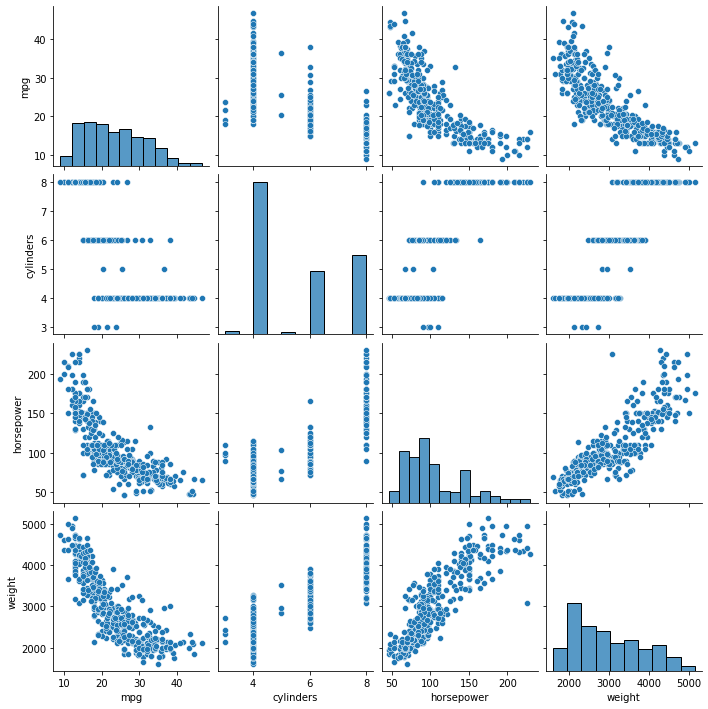

In [6]:
sns.pairplot(ndf)

# 3. 데이터 분리

In [7]:
# 입력 데이터 (독립변수)
x = ndf[['weight']]

# 출력(정답) 데이터 (종속변수)
y = ndf[['mpg']]

In [8]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

print(f'x train shape : {x_train.shape}\tx_test shape : {x_test.shape}')
print(f'y train shape : {y_train.shape}\ty_test shape : {y_test.shape}')

x train shape : (313, 1)	x_test shape : (79, 1)
y train shape : (313, 1)	y_test shape : (79, 1)


# 4. Create Simple Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

# Linear Regression 객체 생성
lr = LinearRegression()

# 훈련(학습) 모델 생성
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 5. Evaluation Simple Linear Regression Model

In [10]:
print(f'연비 예측 단순 선형 회귀 모델 결정 계수 (R-제곱) : \
{lr.score(x_test, y_test)}')

연비 예측 단순 선형 회귀 모델 결정 계수 (R-제곱) : 0.6533466675646016


In [11]:
print(f'w(weight, 기울기) 값 : {lr.coef_}')
print(f'b(bias, 절편) 값 : {lr.intercept_}')

w(weight, 기울기) 값 : [[-0.00790361]]
b(bias, 절편) 값 : [47.20052643]


- y = -0.00790361 * x + 47.20052643

# 6. Visualization of training process

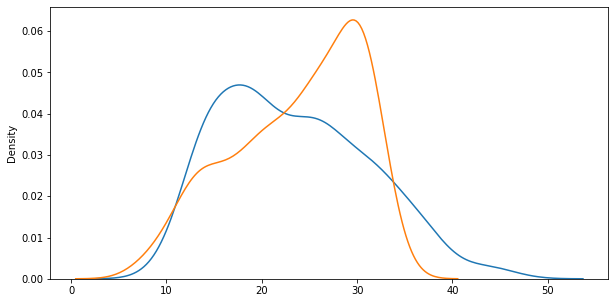

In [12]:
# forecasting value through model
y_hat = lr.predict(x)

plt.figure(figsize=(10, 5))
ax1 = sns.distplot(y, hist=False, label='y')
ax2 = sns.distplot(y_hat, hist=False, label='y_hat', ax=ax1)